In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import tree
import re

In [60]:
def load_data():
    '''
    Загрузка данных
    '''
    data = pd.read_csv('health_unit_district_wise_covid_19_vaccination_in_tamilnadu_as_on_30_05_2021.csv')
    return data


def preprocess_data(data_in):
    '''
    Масштабирование признаков, функция возвращает X и y для кросс-валидации
    '''
    data_out = data_in.copy()
    # Числовые колонки для масштабирования
    scale_cols = ['Session planned for Covishield', 'Achievement towards vaccination of 1st Dosage Covishield to beneficiaries of 18 years and less than 44 years age group']
    new_cols = []
    sc1 = MinMaxScaler()
    sc1_data = sc1.fit_transform(data_out[scale_cols])
    for i in range(len(scale_cols)):
        col = scale_cols[i]
        new_col_name = col + '_scaled'
        new_cols.append(new_col_name)
        data_out[new_col_name] = sc1_data[:, i]
    X = data_out[new_cols]
    Y = data_out['Session held for Covishield']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
    return X_train, X_test, y_train, y_test, X, Y


data = load_data()

In [61]:
data.head()

,S.No,Health Unit District,Session planned for Covishield,Session held for Covishield,Achievement towards vaccination of 1st Dosage Covishield to HCW,Achievement towards vaccination of 2nd Dosage Covishield to HCW,Achievement towards vaccination of 1st Dosage Covishield to FLW,Achievement towards vaccination of 2nd Dosage Covishield to FLW,Achievement towards vaccination of 1st Dosage Covishield to beneficiaries of 18 years and less than 44 years age group,Achievement towards vaccination of 2nd Dosage Covishield to beneficiaries of 18 years and less than 44 years age group,...,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to FLW,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to beneficiaries of 18 years and less than 44 years age group,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to beneficiaries of 18 years and less than 44 years age group,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to beneficiaries of 45 years and less than 60 years age group with Comorbidities,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to beneficiaries of 45 years and less than 60 years age group with Comorbidities,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to 60+ years beneficiaries with Comorbidities,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to 60+ years beneficiaries with Comorbidities,Total Achievement towards vaccination to beneficiaries under 1st Dose of Covishield and Covaxin,Total Achievement towards vaccination to beneficiaries under 2nd Dose of Covishield and Covaxin,Total Achievement towards vaccination of Covishield and Covaxin (1st and 2nd Dose)
0,1,Aranthangi,41,41,0,2,2,5,36,0,...,9,59,0,47,24,17,6,126,43,169
1,2,Ariyalur,66,66,15,7,5,10,585,0,...,10,625,0,281,17,32,8,958,42,1000
2,3,Attur,51,51,0,0,0,0,0,0,...,0,0,0,6,4,0,0,6,4,10
3,4,Chengalpet,30,30,10,0,1,0,346,0,...,4,1180,0,553,36,259,21,2003,61,2064
4,5,Chennai,90,90,27,3,110,7,2042,0,...,47,3993,0,2270,405,726,125,7179,655,7834


In [62]:
data.shape

(45, 45)

In [63]:
data.isnull().sum()

S.No                                                                                                                                                           0
Health Unit District                                                                                                                                           0
Session planned for Covishield                                                                                                                                 0
Session held for Covishield                                                                                                                                    0
Achievement towards vaccination of 1st Dosage Covishield to HCW                                                                                                0
Achievement towards vaccination of 2nd Dosage Covishield to HCW                                                                                                0
Achievement towards vaccination of

In [64]:
data.dtypes

S.No                                                                                                                                                            int64
Health Unit District                                                                                                                                           object
Session planned for Covishield                                                                                                                                  int64
Session held for Covishield                                                                                                                                     int64
Achievement towards vaccination of 1st Dosage Covishield to HCW                                                                                                 int64
Achievement towards vaccination of 2nd Dosage Covishield to HCW                                                                                                 int64
Achi

In [65]:
data.describe()

,S.No,Session planned for Covishield,Session held for Covishield,Achievement towards vaccination of 1st Dosage Covishield to HCW,Achievement towards vaccination of 2nd Dosage Covishield to HCW,Achievement towards vaccination of 1st Dosage Covishield to FLW,Achievement towards vaccination of 2nd Dosage Covishield to FLW,Achievement towards vaccination of 1st Dosage Covishield to beneficiaries of 18 years and less than 44 years age group,Achievement towards vaccination of 2nd Dosage Covishield to beneficiaries of 18 years and less than 44 years age group,Achievement towards vaccination of 1st Dosage Covishield to beneficiaries of 45 years and less than 60 years age group with Comorbidities,...,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to FLW,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to beneficiaries of 18 years and less than 44 years age group,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to beneficiaries of 18 years and less than 44 years age group,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to beneficiaries of 45 years and less than 60 years age group with Comorbidities,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to beneficiaries of 45 years and less than 60 years age group with Comorbidities,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to 60+ years beneficiaries with Comorbidities,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to 60+ years beneficiaries with Comorbidities,Total Achievement towards vaccination to beneficiaries under 1st Dose of Covishield and Covaxin,Total Achievement towards vaccination to beneficiaries under 2nd Dose of Covishield and Covaxin,Total Achievement towards vaccination of Covishield and Covaxin (1st and 2nd Dose)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,...,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.000000,45.533333,44.955556,3.000000,1.333333,23.044444,1.222222,417.822222,0.0,307.511111,...,4.400000,637.155556,0.0,331.755556,55.200000,109.933333,26.955556,1107.222222,91.355556,1198.577778
std,13.133926,28.664676,29.017985,9.816498,3.636932,77.816788,2.754244,493.723344,0.0,531.891976,...,9.656369,768.935538,0.0,568.957706,80.459363,223.154797,42.491687,1393.188689,138.270676,1511.056817
min,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,24.000000,20.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.0,35.000000,...,0.000000,129.000000,0.0,53.000000,14.000000,7.000000,0.000000,315.000000,19.000000,396.000000
50%,23.000000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,230.000000,0.0,122.000000,...,0.000000,398.000000,0.0,124.000000,30.000000,32.000000,8.000000,883.000000,55.000000,883.000000
75%,34.000000,61.000000,61.000000,0.000000,1.000000,4.000000,0.000000,585.000000,0.0,315.000000,...,4.000000,981.000000,0.0,344.000000,63.000000,113.000000,28.000000,1321.000000,85.000000,1455.000000
max,45.000000,105.000000,105.000000,58.000000,20.000000,415.000000,10.000000,2042.000000,0.0,2828.000000,...,47.000000,3993.000000,0.0,3007.000000,405.000000,1263.000000,200.000000,7179.000000,655.000000,7834.000000


In [66]:
data['Session held for Covishield'] = sc1.fit_transform(data[['Session held for Covishield']])

### Разделяем выборку на тестовую и обучающую

In [67]:
X_train, X_test, Y_train, Y_test, X, Y = preprocess_data(data)
Y_test.head()

3     0.271845
2     0.475728
30    0.116505
21    0.058252
22    0.174757
Name: Session held for Covishield, dtype: float64

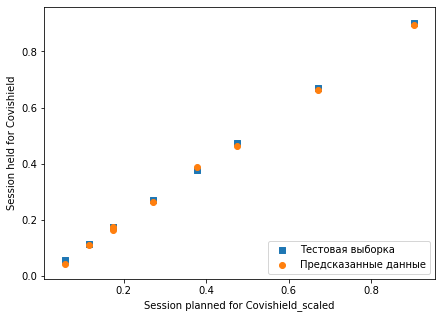

In [68]:
# Модель линейной регрессии
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)


fig3 = plt.figure(figsize=(7, 5))
plt.scatter(X_test['Session planned for Covishield_scaled'], Y_test, marker='s', label='Тестовая выборка')
plt.scatter(X_test['Session planned for Covishield_scaled'], lr_y_pred, marker='o', label='Предсказанные данные')
plt.legend(loc='lower right')
plt.xlabel('Session planned for Covishield_scaled')
plt.ylabel('Session held for Covishield')
plt.show()


In [69]:
# Средняя абсолютная ошибка
mean_absolute_error(Y_test, lr_y_pred)

0.008744568269520277

In [70]:
# Коэффициент детерминации
r2_score(Y_test, lr_y_pred)

0.9987540315739768

In [71]:
# Дерево решений
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

In [72]:
lr_y_pred = clf.predict(X_test)


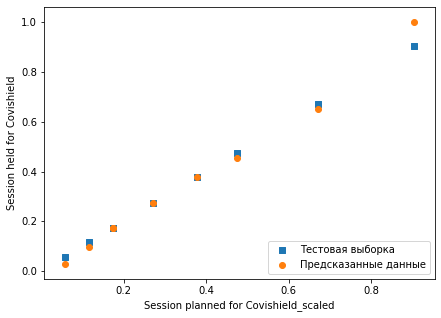

In [73]:
fig5 = plt.figure(figsize=(7, 5))
plt.scatter(X_test['Session planned for Covishield_scaled'], Y_test, marker='s', label='Тестовая выборка')
plt.scatter(X_test['Session planned for Covishield_scaled'], lr_y_pred, marker='o', label='Предсказанные данные')
plt.legend(loc='lower right')
plt.xlabel('Session planned for Covishield_scaled')
plt.ylabel('Session held for Covishield')
plt.show()

In [74]:
# Средняя абсолютная ошибка
mean_absolute_error(Y_test, lr_y_pred)

0.020496224379719534

In [75]:
# Коэффициент детерминации
r2_score(Y_test, lr_y_pred)

0.9819319086806477

In [76]:
from sklearn.svm import SVR
svr_1 = SVR()
svr_1.fit(X_train, Y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
y_pred_1 = svr_1.predict(X_test)

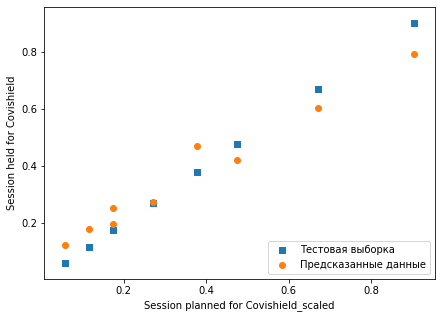

In [78]:
fig5 = plt.figure(figsize=(7, 5))
plt.scatter(X_test['Session planned for Covishield_scaled'], Y_test, marker='s', label='Тестовая выборка')
plt.scatter(X_test['Session planned for Covishield_scaled'], y_pred_1, marker='o', label='Предсказанные данные')
plt.legend(loc='lower right')
plt.xlabel('Session planned for Covishield_scaled')
plt.ylabel('Session held for Covishield')
plt.show()

In [79]:
mean_absolute_error(Y_test, y_pred_1), mean_squared_error(Y_test, y_pred_1)

(0.061233184940736596, 0.004694654998016561)